In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preparation data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

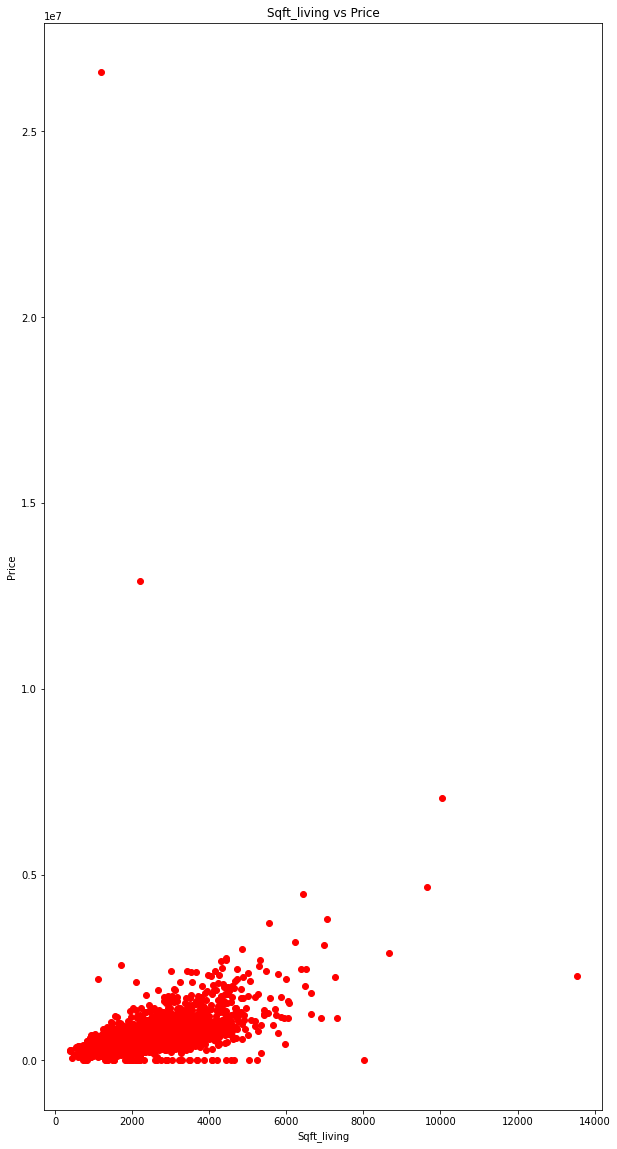

In [5]:
plt.figure(figsize=(10,20))
plt.title('Sqft_living vs Price')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.scatter(df['sqft_living'], df['price'], color = 'red')
plt.show()


The price is too much wide so we have to exclude extreme data

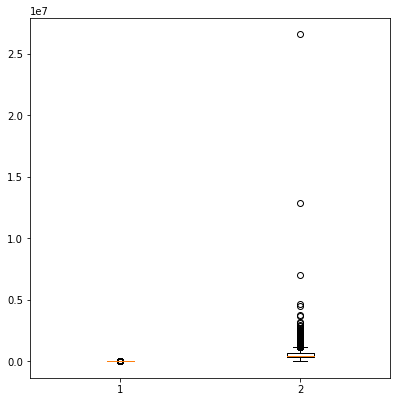

In [13]:
#Convert data frame to array
sqft = np.array(df['sqft_living'])
price = np.array(df['price'])
data = np.c_[sqft,price]

# Creating boxplot
fig = plt.figure(figsize=(5,5))

# Creating axes instance
ax = fig.add_axes([0, 0,1,1])
# Creating plot
bp = ax.boxplot(data)

plt.show()

price have wider spread

In [15]:
upper_limit = df['price'].mean()+ 3*df['price'].std()
lower_limit = df['price'].mean()- 3*df['price'].std()
print('Upper Limit :', upper_limit)
print('Lower Limit :', lower_limit)

Upper Limit : 2243467.096114639
Lower Limit : -1139541.1191682108


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

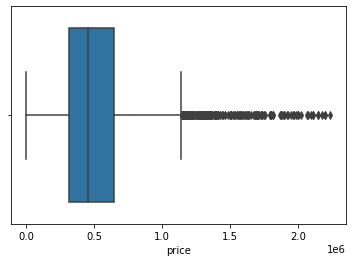

In [24]:
import seaborn as sns

prices = df.loc[(df['price'] < upper_limit)]
sns.boxplot(prices['price'])

# Modeling Gradient Descent

Prepare x-axis and y-axis

In [46]:
x = prices['sqft_living']
y = prices['price'].astype('int32')

#Normalize x
x = (x - x.mean()) / x.std()

In [61]:
def gradient_descent(x,y):
    n = len(x) #No. Data Point
    learning_rate = 0.001 #Step Size
    m_curr = b_curr = 0 #define theta0 & theta1 0
    iteration = 1000 #No. Iteration
    
    for i in range(iteration):
        y_predicted = m_curr * x + b_curr
        md = -(2/n)*sum(x*(y-y_predicted)) # Slope derivatif
        bd = -(2/n)*sum(y-y_predicted) # Intercept derivatif
        cost = (1/n)*sum([val**2 for val in (y-y_predicted)]) #Cost Function
        #cost = (1/n)*sum((y-y_predicted)**2) #Cost Function
        past_costs.append(cost)
        m_curr = m_curr - learning_rate * md
        m.append(m_curr)
        b_curr = b_curr - learning_rate * bd
        b.append(b_curr)
        print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))
        
    return m_curr, b_curr

past_costs = []
m = []
b = []
gradient_descent(x,y)

m 391.91963646027915, b 1054.4895895751206, cost 371214719517.3984, iteration 0
m 783.0556053163359, b 2106.870199971091, cost 369950435737.0869, iteration 1
m 1173.4094735601157, b 3157.1460491462703, cost 368691203900.6068, iteration 2
m 1562.9828050502676, b 4205.321346623096, cost 367437003820.9252, iteration 3
m 1951.7771605184078, b 5251.400293504975, cost 366187815391.67053, iteration 4
m 2339.794097575373, b 6295.3870824930855, cost 364943618586.8268, iteration 5
m 2727.0351707174623, b 7337.285897903218, cost 363704393460.3869, iteration 6
m 3113.5019313326593, b 8377.100915682533, cost 362470120146.054, iteration 7
m 3499.195927706853, b 9414.836303426287, cost 361240778856.913, iteration 8
m 3884.1187050300405, b 10450.49622039456, cost 360016349885.11115, iteration 9
m 4268.271805402513, b 11484.084817528888, cost 358796813601.5527, iteration 10
m 4651.656767841039, b 12515.606237468955, cost 357582150455.5752, iteration 11
m 5034.275128285028, b 13545.064614569139, cost 35

(169518.10618003068, 456032.7283670783)

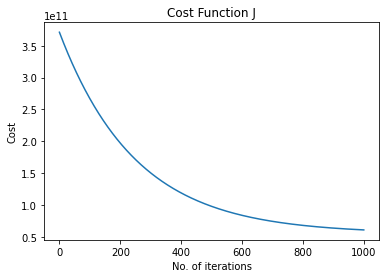

In [56]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

So the optimum value of intercept and slope is

In [60]:
print('intercept = {:.2f}, slope = {:.2f}'.format(m[-1], b[-1]))

intercept = 169518.11, slope = 456032.73


Then we display from gradient descent

Text(0.5, 1.0, 'Sqrt_living vs price')

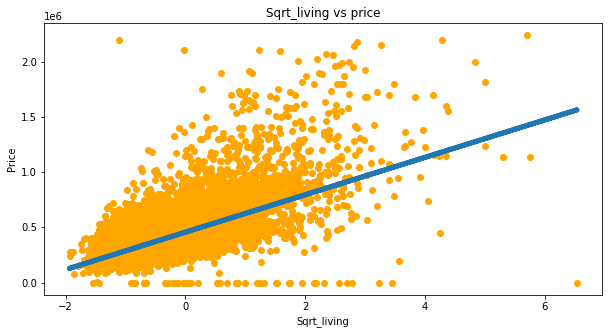

In [76]:
slope = m[-1]
intercept = b[-1]

def my_function(x):
    return slope * x + intercept

y_predicted = list(map(my_function, x))
plt.figure(figsize=(10,5))
plt.scatter(x,y, color='orange')
plt.plot(x,y_predicted, linewidth=5)
plt.xlabel('Sqrt_living')
plt.ylabel('Price')
plt.title('Sqrt_living vs price')

# Conclusion

- With gradient descent we got optimum intercept = 169518.11 and optimum slope = 456032.73